## Reference from Kaggle Kernel
#### Credit to Randy Lao
#### DataSet from "Human Resource Analytics" Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

## Importing the data

In [4]:
df = pd.read_csv("HR_comma_sep.csv")

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Scrubbing the data

In [6]:
# To check if there is any null value
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [7]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [8]:
df.head(2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [9]:
# Move the "turnover column on the front

front = df['turnover']
df.drop(['turnover'], axis=1, inplace = True)
df.insert (0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


## Data Exploration

### Statistical Overview

In [10]:
df.shape

(14999, 10)

In [11]:
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [17]:
(df.turnover.value_counts())

0    11428
1     3571
Name: turnover, dtype: int64

In [18]:
turnover_rate= (df.turnover.value_counts())/len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [19]:
# Statistical overview of the employess
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [21]:
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Conclusion from the above stats
***
The dataset has:
 - About 15,000 employee observations and 10 features 
 - The company had a turnover rate of about 24%
 - Mean satisfaction of employees is 0.61
 - Median number of years at Company is 3yrs

### Correlation Matrix and Heatmap

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


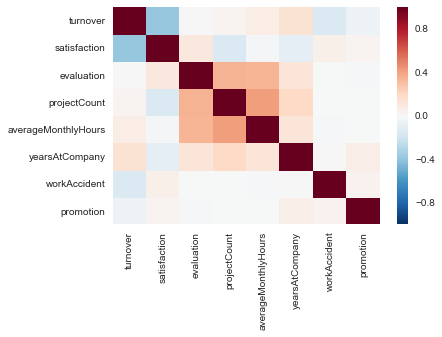

In [26]:
# Correlation

corr = df.corr()

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
corr

Conclusion:
***
**Moderate Positively Correlated Features:** 
- projectCount vs evaluation: 0.349333
- projectCount vs averageMonthlyHours:  0.417211
- averageMonthlyHours vs evaluation: 0.339742

**Moderate Negatively Correlated Feature:**
 - satisfaction vs turnover:  -0.388375


**Summary:**

From the heatmap, there is a **positive(+)** correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly. 

For the **negative(-)** relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied. 

### Statistical Test for correlation



#### One-Sample T-Test (Measuring Satisfaction Level)
A one-sample t-test checks whether a sample mean differs from the population mean. Since satisfaction has the highest correlation with our dependent variable turnover, let's test to see whether the average satisfaction level of employees that had a turnover differs from the those that had no turnover.

**Hypothesis Testing:** Is there significant difference in the **means of satisfaction level** between employees who had a turnover and temployees who had no turnover?

 - **Null Hypothesis:** *(H0: pTS = pES)* The null hypothesis would be that there is **no** difference in satisfaction level between employees who did turnover and those who did not..

 - **Alternate Hypothesis:** *(HA: pTS != pES)* The alternative hypothesis would be that there **is** a difference in satisfaction level between employees who did turnover and those who did not..

In [34]:
emp_population_noTurnover = df[df['turnover']==0]['satisfaction'].mean()
mp_population_Turnover = df[df['turnover']==1]['satisfaction'].mean()


print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population_noTurnover))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_population_Turnover) )

The mean satisfaction for the employee population with no turnover is: 0.666809590479516
The mean satisfaction for employees that had a turnover is: 0.44009801176140917


##### Conducting the T-Test
***
Let's conduct a t-test at **95% confidence level** and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the **stats.ttest_1samp()** function, 

stats.ttest_1samp() is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In [35]:
import scipy.stats as stats

stats.ttest_1samp(a = df[df['turnover']==1]['satisfaction'], 
                  popmean = emp_population_noTurnover)

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

##### T-Test Result
***
The test result shows the **test statistic "t" is equal to -51.33**. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies **outside** the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with **stats.t.ppf()**:

In [37]:
degree_freedom

3571

In [36]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025, degree_freedom)  # left quartile
RQ = stats.t.ppf(0.975, degree_freedom)  # right quartile


print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))


The t-distribution left quartile range is: -1.9606285216
The t-distribution right quartile range is: 1.9606285216


Conclusion

***
#### **T-Test = -51.33**       |        **P-Value = 0.000_**       |       **Reject Null Hypothesis**

## Is the P-Value literally 0.0? 

**Reject the null hypothesis because:**
 - T-Test score is outside the quantiles
 - P-value is lower than confidence level of 5%

Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of **0.00_** at a 5% confidence level is a good indicator to **reject the null hypothesis**. 

But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding.

<img src="https://static1.squarespace.com/static/5144a1bde4b033f38036b7b9/t/56714b05c647ad9f555348fa/1450265419456/PresentWIP.gif?format=500w"/>

### Distribution Plots (Satisfaction, Evaluation, AverageMonthlyHours)

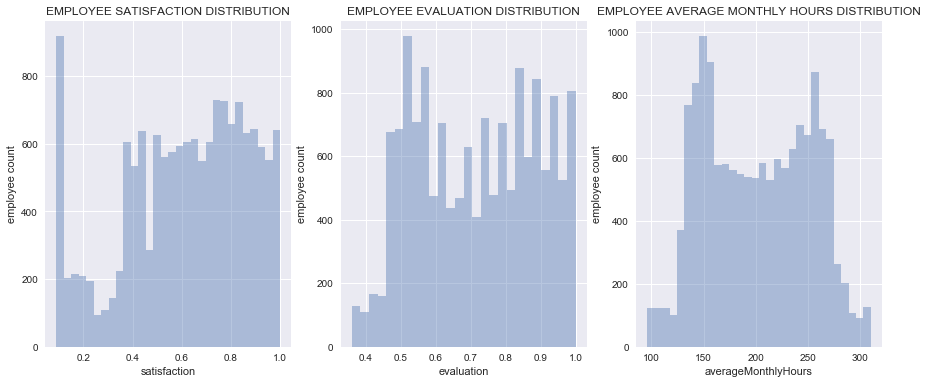

In [44]:
f, axes = plt.subplots(ncols=3, figsize = (15,6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, ax= axes[0]).set_title('EMPLOYEE SATISFACTION DISTRIBUTION')
axes[0].set_ylabel("employee count")

# Graph Employee evaluation
sns.distplot(df.evaluation, kde=False, ax= axes[1]).set_title('EMPLOYEE EVALUATION DISTRIBUTION')
axes[1].set_ylabel("employee count")

# Graph Employee Average Monthly hours
sns.distplot(df.averageMonthlyHours, kde=False, ax= axes[2]).set_title('EMPLOYEE AVERAGE MONTHLY HOURS DISTRIBUTION')
axes[2].set_ylabel("employee count")



Conclusion

***
**Summary:** Let's examine the distribution on some of the employee's features. Here's what I found:
 - **Satisfaction** - There is a huge spike for employees with low satisfaction and high satisfaction.
 - **Evaluation** - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
 - **AverageMonthlyHours** - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
 
 - The evaluation and average monthly hour graphs both share a similar distribution. 
 - Employees with lower average monthly hours were evaluated less and vice versa.
 - If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.
 

### Salary vs Turnover

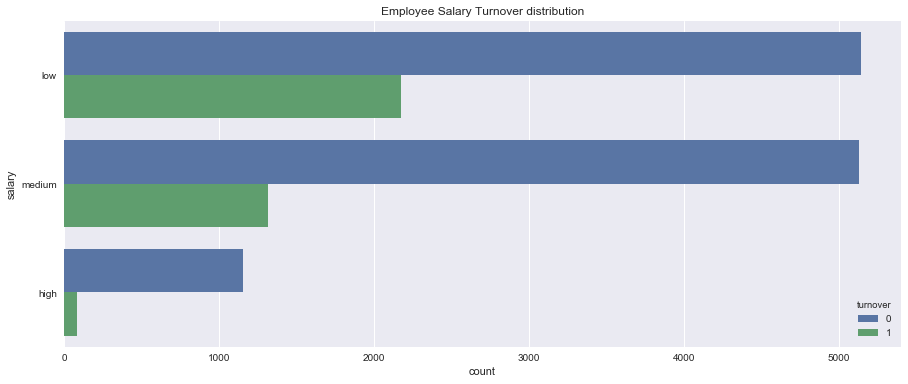

In [52]:
f, axes = plt.subplots(figsize=(15,6))

sns.countplot(y='salary', hue = 'turnover', data=df).set_title('Employee Salary Turnover distribution')

Conclusion

***
**Summary:** This is not unusual. Here's what I found:
 - Majority of employees who left either had **low** or **medium** salary.
 - Barely any employees left with **high** salary
 - Employees with low to average salaries tend to leave the company.
 
**Think:** 
 
 - What made employees with high salaries to leave?

### Department vs Turnover

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

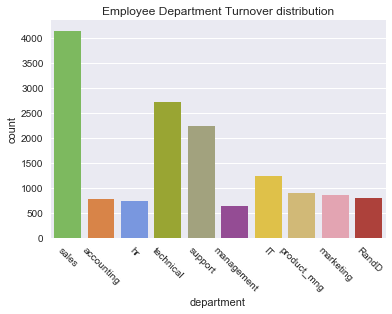

In [75]:
#Employee Distribution across the department

# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department',  data=df, palette = color_types).set_title('Employee Department Turnover distribution')

plt.xticks(rotation =-45)

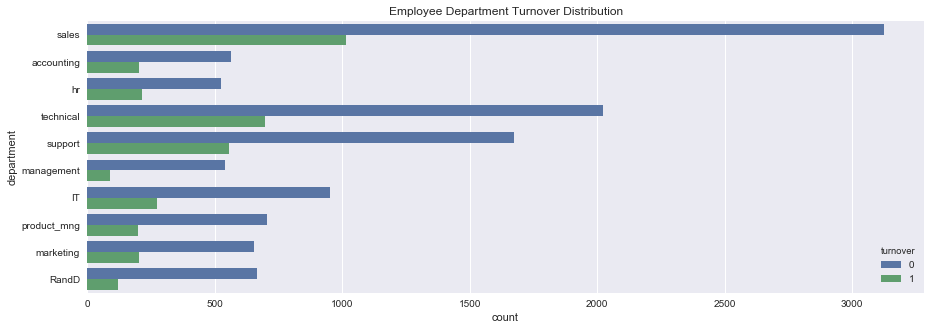

In [77]:
f, ax = plt.subplots(figsize=(15, 5))

# hue = turnover gives the count between two classes
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution')

Conclusion

 - The **sales, technical, and support department** were the top 3 departments to have employee turnover
 - The management department had the smallest amount of turnover
 
